#### **HSS 611 - Week 11: API and Requests**

**November 4, 2024**


#### **Agenda**

-   What/why is an API?

-   The `requests` library

-   Examples of the Wikipedia API




#### **What is API (Application Programming Interface)**

-   A set of routines, tools, and standards that enable software applications to interact with each other

-   In simple terms, APIs are an intermediary between two software applications
    - E.g., YouTube (API provider) and your program for collecting comments (API consumer) connected by YouTube APIs
    - E.g., OpenAI (API provider) and a customer support application (API consumer) connected by the OpenAI API to generate responses to user queries.

-   It allows researchers/developers to access a particular software application (without understanding the underlying structure)

-   For HSS research, APIs are widely used for data collection, providing structured, reliable access to data from various services
    -   Lots of data live on the web
        - E.g., data from Wikipedia, YouTube, Spotify, etc.
    -   Collecting data on scale
        -   Manual browsing/copying/pasting infeasible
        -   Need to access programmatically



#### **API vs. webscraping for data collection**
- APIs provide data specifically structured for automated access by applications, making it easier for machines to retrieve and process information
- If an API was created for a service, there is likely an intention to maintain
- If you can achieve your goal with an API, use the API
- Some services just do not have an API, then we can consider webscraping



#### **HTTP (Hypertext Transfer Protocol)**

-   Foundational to both web-based APIs and webscraping
-   HTTP is a protocol (i.e., a set of rules and conventions) used to transfer data over the web
    -   Allows consumers to interact with providers in a structured way, specifying exactly what they want to do
    -   When two software applications intreact over the web, "request"s and "response"s are exchanged based on HTTP

-   "Request"  

    -   GET: retrieve data (this is for data collection)
    -   POST: create data
    -   PUT: update data
    -   DELETE: delete data

-   "Response" is the result provided by the API

-   "Key" for an API is provided to users and used to check whether the request is made from an authenticated one
    - Not all APIs require a key (open-access)

-   "Endpoint" works as a front door for an API and provides users with an access point to the server (or host)
    - Endpoitns within an API have a specific URL to provide access to particular functionalities


#### **What does `requests` library do?**

-   One of the most popular libraries in Python
-   Allows us to interact with servers by sending requests (like GET, POST, PUT, DELETE) and handling responses
-   While API-specific libraries often hide HTTP requests from view (e.g., OpenAI's `openai` library), they are still built on the same HTTP concepts that `requests` library handles directly
- `requests` is useful if there is no dedicated library for a specific API (e.g., Wikipedia)
- `requests` is essential for webscraping (when the service does not offer an API)

#### **GET request to get the HTML of a webpage (no API involved)**

- Send a request with to a URL
- Get an HTML (Hypertext Markup Language) document for the URL (or webpage)

In [ ]:
### we now have a "Response" object

import requests
r = requests.get('https://ghss.kaist.ac.kr/pages/sub/sub02_03')
type(r)

requests.models.Response

In [ ]:
print(r.text) # print the html file

#### **More on HTML**

-   Language for documents designed to be displayed on the web.
-   Used for creating and structuring sections, paragraphs, and links for web pages
-   Typically they contain a lot of information
-   Not all of these are useful for a researcher




#### **Getting relevant information from HTML documents**

-   We need to extract part of the information that is useful

-   E.g., no need for the Wikipedia logo, search bar, links to other languages, "Create Account", or "Log In"

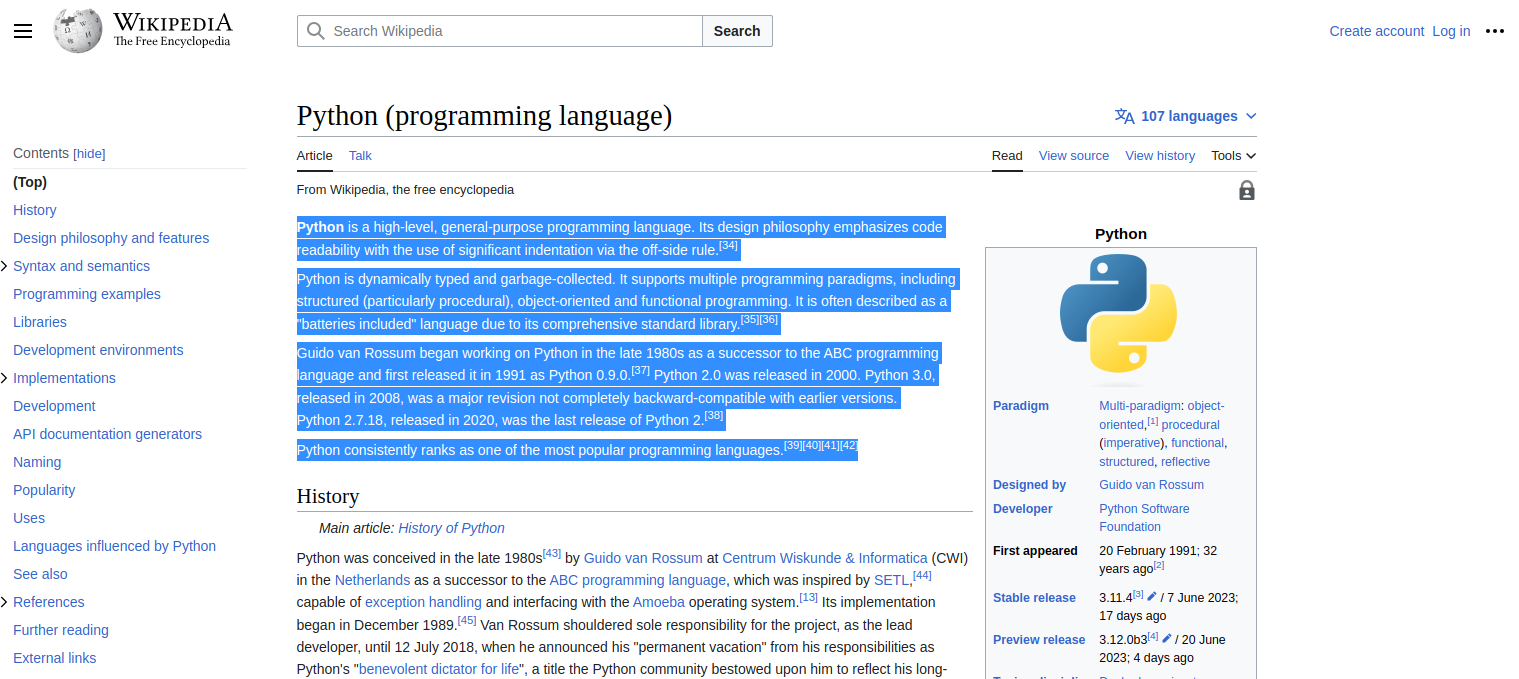




#### **Parsing HTML**

-   To parse an HTML document, we need a parser, a software that

    -   Recognizes the structure of an HTML document
    -   Allows for the extraction of certain parts

-   The `beautifulSoup` library serves that purpose

-   We will look into that in the next week




#### **GET request to retrieve data though an API**

-   Requests typically start with an `endpoint` defined by the server (or "host" as opposed to "clients")

-   For instance, English Wikipedia provides the `https://en.wikipedia.org/w/api.php` endpoint

- Parameters are specified in the following format (note the `?` in the beginning)
  - `?param1=value1&param2=value2&param3=value3...`

- For example:

  -   `https://www.example.com/api/posts?query=america&sort=newest`
  -   `https://www.example.com/api/posts` is the endpoint
  -   Query to search for is "america"
  -   Results should be sorted from "newest"

-   What the possible parameters are depends on the system

  -   Need to check documentation

-   Many APIs will return data in JSON format, and sometimes XML is also used

-   Some will allow you to specify `&format=json` or `&format=xml` or something of this sort

#### **JSON vs XML**

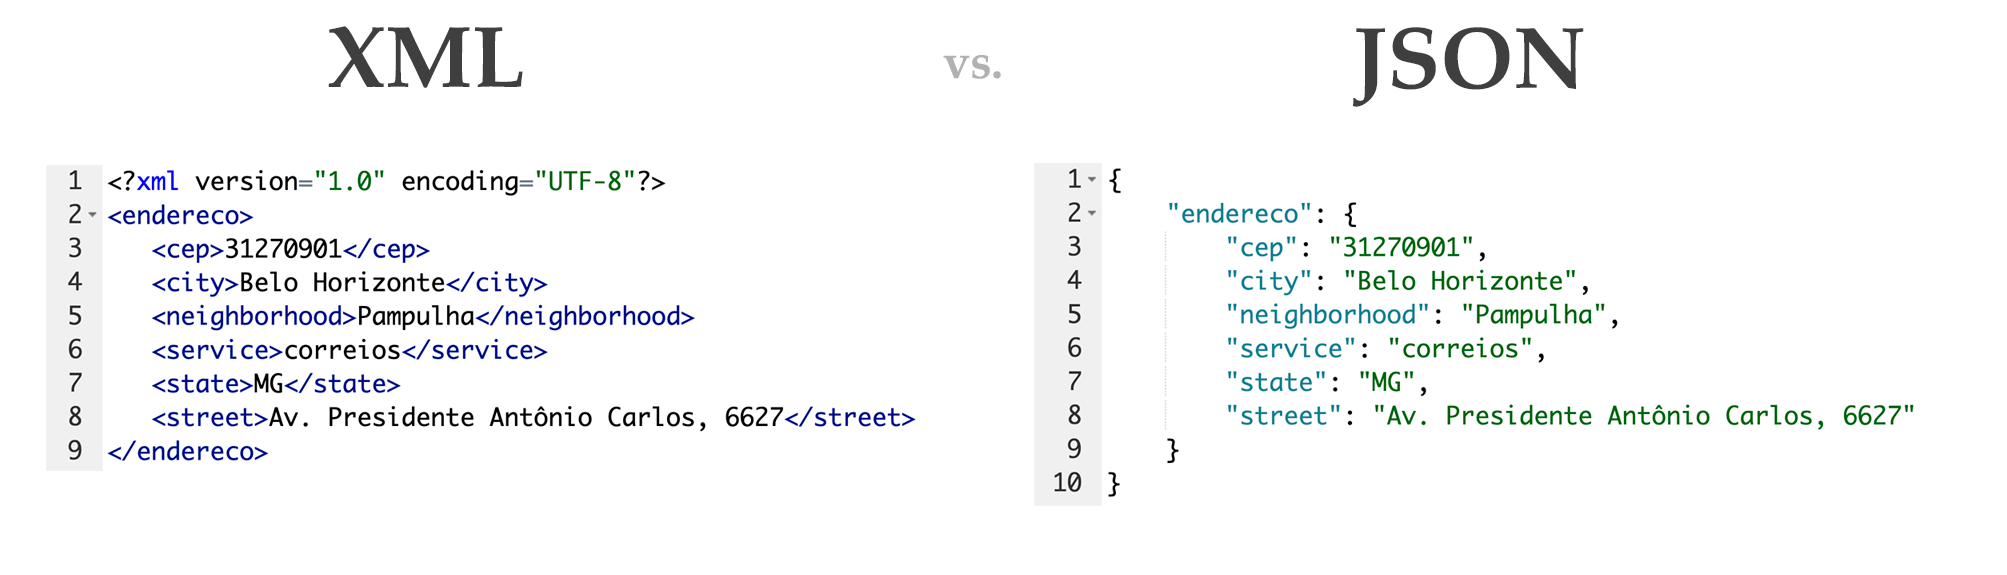

-   Python's `json` and `xml` modules parse these types, but `json` is much more common and easier




#### **Example: Wikipedia API**

-   English Wikipedia's `https://en.wikipedia.org/w/api.php` API endpoint (MediaWiki Action API)

-   We will use it for demo purposes

-   None of the parameters in this Wikipedia API is necessarily common across APIs

-   Again, for any API, you need to check documentation

    -   Which parameters are used?
    -   What are the possible values?
    -   Do I need an API key?

-   We will do the following

  -   Get information on the Wikipedia page `"Jimmy Carter"`

  -   Return in JSON format

  -   Get data on other language versions

In [ ]:
### get request

endpoint = 'https://en.wikipedia.org/w/api.php'
req = endpoint + '?action=query&titles=Jimmy Carter&prop=langlinkscount&format=json' # langlinkscount: "get the number of other language versions"
r = requests.get(req)

In [ ]:
### check the status code

r.status_code

200


  -   See [here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes) for an exhaustive list of status codes
  -   Some of the most common status codes related to "GET"
    
      -   200 OK: Data retrieved successfully
      -   400 Bad Request: The server did not understand the request, possibly due to a missing or incorrect parameter
      -   401 Unauthorized: You might need authentication or your key might be wrong
      -   403 Forbidden: You do not have permission to access the data
      -   404 Not Found: The endpoint or data you are trying to access does not exist
      -   429 Too Many Requests: You haveve hit a rate limit and need to slow down your requests

In [ ]:
### check the data type

type(r)

requests.models.Response

In [ ]:
### returned text is a string in JSON format

print(r.text)

{"batchcomplete":"","query":{"pages":{"15992":{"pageid":15992,"ns":0,"title":"Jimmy Carter","langlinkscount":154}}}}


In [ ]:
### json module can parse this and turn into a dictionary

import json
d = json.loads(r.text)
type(d)

### print it

import pprint
pp = pprint.PrettyPrinter()
pp.pprint(d)

{'batchcomplete': '',
 'query': {'pages': {'15992': {'langlinkscount': 154,
                               'ns': 0,
                               'pageid': 15992,
                               'title': 'Jimmy Carter'}}}}


In [ ]:
### instead of creating a giant string to the request, we can pass them with a parameter dictionary

endpoint = 'https://en.wikipedia.org/w/api.php'
parameters = {'action':'query',
              'titles':'Jimmy Carter',
              'prop':'langlinkscount',
              'format': 'json'}

r = requests.get(endpoint, params = parameters)

In [ ]:
### also, instead of first getting a string and converting it to a dictionary, we can simply do the following

d = r.json() # use .json() method directly on the response object
pp.pprint(d)

{'batchcomplete': '',
 'query': {'pages': {'15992': {'langlinkscount': 154,
                               'ns': 0,
                               'pageid': 15992,
                               'title': 'Jimmy Carter'}}}}


In [ ]:
### access values in the dictionary

d['query']['pages']
d['query']['pages']['15992']['langlinkscount']

{'15992': {'pageid': 15992,
  'ns': 0,
  'title': 'Jimmy Carter',
  'langlinkscount': 154}}

In [ ]:
### get daily pageviews associated with a given page

parameters = {'action':'query',
              'titles':'Jimmy Carter',
              'prop':'pageviews',
              'format': 'json'}

r = requests.get(endpoint, params = parameters)
r.status_code

200

In [ ]:
pp.pprint(r.json())

{'batchcomplete': '',
 'query': {'pages': {'15992': {'ns': 0,
                               'pageid': 15992,
                               'pageviews': {'2024-09-05': 15784,
                                             '2024-09-06': 16557,
                                             '2024-09-07': 20317,
                                             '2024-09-08': 19664,
                                             '2024-09-09': 18081,
                                             '2024-09-10': 20376,
                                             '2024-09-11': 22340,
                                             '2024-09-12': 18576,
                                             '2024-09-13': 17334,
                                             '2024-09-14': 17132,
                                             '2024-09-15': 21434,
                                             '2024-09-16': 22804,
                                             '2024-09-17': 26338,
                                

In [ ]:
len(r.json()['query']['pages']['15992']['pageviews']) # to go beyond 60 days, you need to use another API (e.g., Wikimedia REST API)

60

In [ ]:
### get information about what those languages are

parameters = {'action':'query',
              'titles':'Jimmy_Carter',
              'prop':'langlinks',
              'format': 'json'}

r = requests.get(endpoint, params = parameters)
r.status_code

200

In [ ]:
### there are not 152 languages here?

r.json()

{'continue': {'llcontinue': '15992|ay', 'continue': '||'},
 'query': {'normalized': [{'from': 'Jimmy_Carter', 'to': 'Jimmy Carter'}],
  'pages': {'15992': {'pageid': 15992,
    'ns': 0,
    'title': 'Jimmy Carter',
    'langlinks': [{'lang': 'ace', '*': 'Jimmy Carter'},
     {'lang': 'af', '*': 'Jimmy Carter'},
     {'lang': 'als', '*': 'Jimmy Carter'},
     {'lang': 'am', '*': 'ጂሚ ካርተር'},
     {'lang': 'an', '*': 'Jimmy Carter'},
     {'lang': 'ang', '*': 'Iacobus Carter'},
     {'lang': 'ar', '*': 'جيمي كارتر'},
     {'lang': 'ary', '*': 'دجيمي كارتر'},
     {'lang': 'arz', '*': 'جيمى كارتر'},
     {'lang': 'ast', '*': 'Jimmy Carter'}]}}}}

In [ ]:
parameters = {'action':'query',
              'titles':'Jimmy_Carter',
              'prop':'langlinks',
              'format': 'json',
              'lllimit': 'max'}

r = requests.get(endpoint, params = parameters)
r.status_code

200

In [ ]:
pp.pprint(r.json())

r.json()['query']['pages']['15992']['langlinks']

154

In [ ]:
len(r.json()['query']['pages']['15992']['langlinks'])

In [ ]:
### many other requests are possible: for example, this API allows combining titles with the `|` sign

parameters = {'action':'query',
              'titles':'Jimmy_Carter|George_H._W._Bush',
              'prop':'langlinkscount',
              'format': 'json'}

r = requests.get(endpoint, params = parameters)
r.status_code

200

In [ ]:
r.json()

{'batchcomplete': '',
 'query': {'normalized': [{'from': 'Jimmy_Carter', 'to': 'Jimmy Carter'},
   {'from': 'George_H._W._Bush', 'to': 'George H. W. Bush'}],
  'pages': {'11955': {'pageid': 11955,
    'ns': 0,
    'title': 'George H. W. Bush',
    'langlinkscount': 155},
   '15992': {'pageid': 15992,
    'ns': 0,
    'title': 'Jimmy Carter',
    'langlinkscount': 154}}}}

In [ ]:
### get the content of an Wikipedia page in its entirety

parameters = {'action':'parse',
              'page':'KAIST',
              'format': 'json'}

r = requests.get(endpoint, params = parameters)
r.status_code

200

In [ ]:
r.json()['parse'].keys()
r.json()['parse']['externallinks']

['http://www.alio.go.kr/popReportTerm.do?apbaId=C0160&reportFormRootNo=31401',
 'https://www.kaist.ac.kr/en/html/kaist/012102.html',
 'http://herald.kaist.ac.kr/news/articleView.html?idxno=158',
 'https://www.topuniversities.com/university-rankings-articles/asian-university-rankings/top-10-universities-south-korea-2019',
 'https://roundranking.com/universities/korea-advanced-institute-of-science-and-technology-kaist.html?sort=O&year=2021&subject=SO',
 'http://www.business.kaist.edu/about/010301',
 'http://www.aapbs.org',
 'http://www.dtu.dk/english/Education/msc/Joint-International-Programmes-1-/KAIST',
 'http://www.cmu.edu/news/archive/2007/October/oct4_kaist.shtml',
 'http://www.gt-kaist-dd.gatech.edu/',
 'http://www.eecs.tu-berlin.de/fileadmin/f4/fkIVdokumente/doppelabkommen/dd-tu-kaist.pdf',
 'https://web.archive.org/web/20100528005546/http://www.kaist.edu/english/01_about/02_glance_03.php',
 'http://www.kaist.edu/english/01_about/02_glance_03.php',
 'http://www.westegg.com/inflati

#### **A wide range of APIs**

-   Public APIs you can use, test, etc.: <https://github.com/public-apis/public-apis>

-   Many, many others!!